<a href="https://colab.research.google.com/github/Mr-Premanand/Machine-Learning---Supervised-learning-models/blob/main/Logistic_Regression_(_Financial_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color= sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
default=pd.read_csv("/content/drive/MyDrive/Machine learning/Data/default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
default.shape

(10000, 4)

In [ ]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


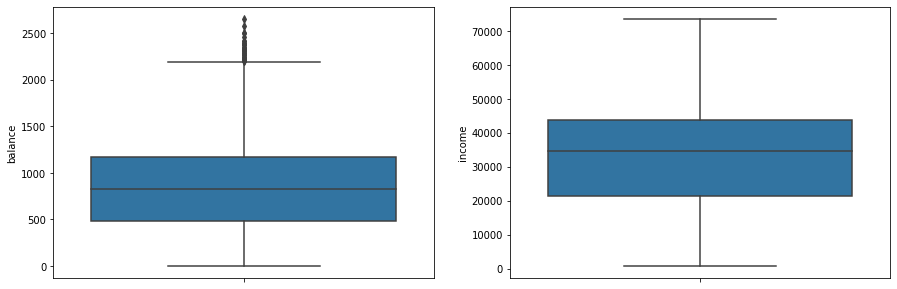

In [ ]:
# Plot the above result for balance and income usinf boxplot for min,(25,50,75)% Percentile,max 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)                        # it is used to plot two chart in one fram , plt.subplot(nrows, ncols, index)
sns.boxplot(y=default["balance"])

plt.subplot(1,2,2)                        
sns.boxplot(y=default["income"])
plt.show()

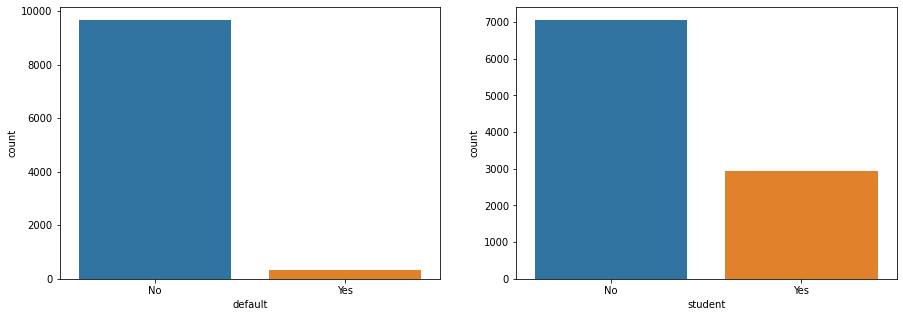

In [ ]:
# Plot the above result for default and student usinf countplot because they are categorical values 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)                        # it is used to plot two chart in one fram , plt.subplot(nrows, ncols, index)
sns.countplot(x=default["default"])

plt.subplot(1,2,2)                        
sns.countplot(default["student"])         # here by default axis is taken as x-axis  does not need to mension as above
plt.show()

In [ ]:
#To get the count of catagoricals values
default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
# To get the above values on the format of ratio use "normalize=True"
default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [ ]:
default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

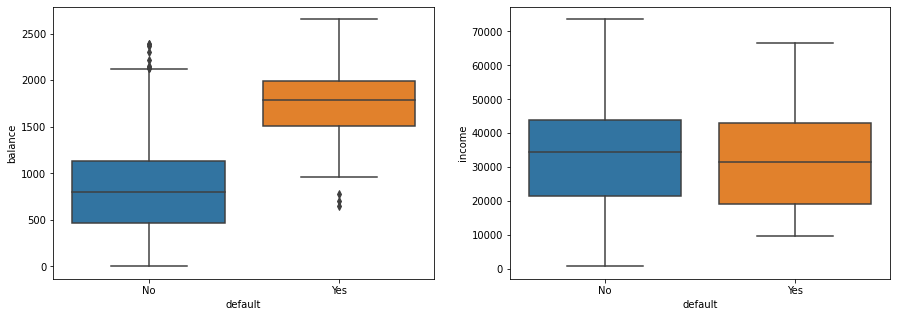

In [ ]:
# for the plot between default,balance and default,income usinf boxplot for min,(25,50,75)% Percentile,max  to get that values in that perticulat category
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)                        
sns.boxplot(default["default"],default["balance"])

plt.subplot(1,2,2)                        
sns.boxplot(default["default"],default["income"])
plt.show()

So from above we can say that defaulter has higher balance than non defaulter,

where as in case of income both the defaulter and non-defaulter has close same income

In [ ]:
# Now check the value cross wise with defaulter and student
pd.crosstab(default["student"],default["default"], normalize="index").round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


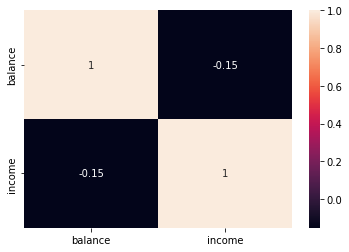

In [ ]:
# so to undeerstand the relation plot the heatmap
sns.heatmap(default[["balance","income"]].corr(), annot=True)
plt.show()

In [ ]:
# Now identifie the outlier values limits, for this we need to find the inter quantile range between 25(q1)-75(q3)% 
q1,q3=default["balance"].quantile([0.25,0.75])

# Now find Inter Quantile Range
IQR=q3-q1

# Now find the upper and lower limit for outlier
UL=q3+1.5*IQR
LL=q1-1.5*IQR

UL,LL

(2193.174308607817, -545.1348170774612)

In above we are finding the outlier for balance column only because from the above box plot it is seen that there are no outlier for income column

In [ ]:
# Now get the values or records which are outside the outlier
df=default[default["balance"]>UL]
df

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [ ]:
# Now we will assign the UL values for outlier values which are greater than Ul
default["balance"]=np.where(default["balance"]>UL, UL, default["balance"])

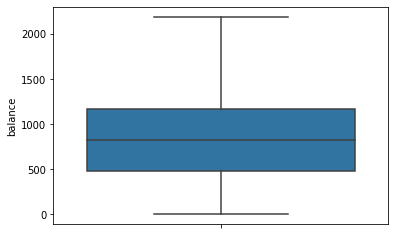

In [ ]:
# Now check that is there any outlier present or not
sns.boxplot(y=default["balance"])          # here we have taken the y axis because by defalut it taken horizontally
plt.show()

# so no any outlier present now

In [ ]:
# Now to get the values for categorical column i.e define 1 if yes and define 0 if no, for default and student column
default=pd.get_dummies(default, drop_first=True)

default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [ ]:
# Now change the name of column
default.columns=['balance'	,'income'	,'default'	,'student']
default.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


# Now, Logistic Regression

In [ ]:
# First define the dependent and indpendent variables
x= default.drop('default', axis=1)        # in this we have taken 3 independent variable other than default variable so tha we drop it and taken other remaining 3 column
                                         # we can directly also can take by puting name of column
y=default[["default"]]

In [ ]:
# Now import the library and split the data set into tain and test dataset
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=21, stratify= y)

# above "stratify" is used to get equal amount of defaulter and non_defaulter in train and test set so that regression relation will be corect

In [ ]:
# check that equally destributed the defaulter and non_defaulter
print(y_train.value_counts(normalize=True).round(2))
print(" ")
print(y_test.value_counts(normalize=True).round(2))

default
0          0.97
1          0.03
dtype: float64
 
default
0          0.97
1          0.03
dtype: float64


as seen above in y_train and y_test both set having equal proportion of default and non defaulter values

But as we seen that there are less yes data and more no data , so to balance them, we will make dummies by using SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE (random_state=33, sampling_strategy=0.75)
x_res, y_res= sm.fit_resample(x_train,y_train)

In [ ]:
# Now import the logistic regression library
from sklearn.linear_model import LogisticRegression

# define model name
lr= LogisticRegression()

In [ ]:
# Now fit the data into the model to get train relationship
lr.fit(x_res,y_res)

LogisticRegression()

In [ ]:
#Now feed test sample to get predicted result of depenedent variables
y_pred=lr.predict(x_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
y_test[:10]

,default
1071,0
9106,0
501,0
6475,0
5943,0
320,0
4905,0
1062,0
9829,0
5650,0


In [ ]:
# Now import confusion matrix to check accaracy 
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_pred)       

# in this we got matrox in the result format i.e in this we got left side result as correctly classified values and right side result as incorrectly classified values

array([[2589,  311],
       [  25,   75]])

In [ ]:
# Now calculate the accuracy by formula
 #= ( summation of left diagonal values )/(summation of all values)

accuracy_of_model = (2589+25)/(2589+25+75+311)
accuracy_of_model

0.8713333333333333

In [ ]:
#Other way to check accuracy
lr.score(x_test,y_test)

0.888

i.e we have 87% of accuracy in out model 